# [DATA] Hackaton Jump2Digital22

## Environment

In [1]:
#Numpy & Pandas
import pandas as pd
import numpy as np

# Pandas options setting
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.float_format = '{:.3f}'.format

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

## Import Data

### Train

In [2]:
train = pd.read_csv('data/train.csv', delimiter=';')

In [3]:
train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,-0.458,-0.579,2.886,-0.076,1.674,-2.432,0.535,-0.846,2
1,1.627,-0.028,-1.443,-1.007,-0.989,1.203,-0.038,-1.299,0
2,1.721,-0.138,-1.323,-1.333,-0.724,0.843,-0.588,0.067,0
3,-0.715,3.266,-0.791,-2.968,2.498,-0.277,-0.552,0.668,2
4,2.944,0.198,-2.257,1.033,-4.105,4.716,-0.381,-1.394,0


### Test

In [4]:
test = pd.read_csv('data/test.csv', delimiter=';')

In [5]:
test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.052,2.515,-0.198,1.979,-2.015,3.853,-2.126,0.795
1,-0.828,0.086,1.713,0.079,1.280,-1.462,2.470,0.817
2,-1.086,-0.142,0.013,-0.115,0.948,-1.122,0.517,0.251
3,0.093,2.869,-0.075,0.651,-0.886,2.917,-0.723,0.063
4,0.046,2.823,0.434,-3.055,2.538,-0.717,0.862,-0.525


In [6]:
df = train.copy()

#### Target (target)

La var target es un número nominal. Una label: 0 (buena) , 1 (moderada) , 2(peligrosa)

In [7]:
target = df.groupby('target')['feature1'].count().reset_index()

In [8]:
target

,target,feature1
0,0,713
1,1,705
2,2,682


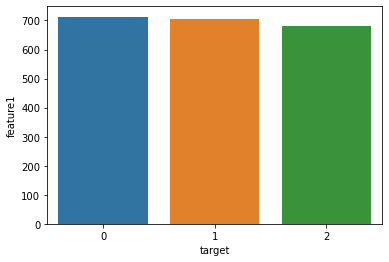

In [9]:
sns.barplot(data=target, x='target', y='feature1')
plt.show()

La target está balanceada

#### Features

FEATURE1

Estadísticas

count   2100.000
mean      -0.319
std        1.575
min       -5.032
25%       -1.406
50%       -0.431
75%        0.774
max        5.388
Name: feature1, dtype: float64

Distribución


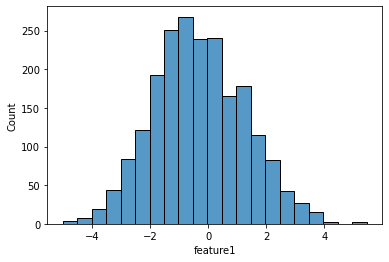

FEATURE2

Estadísticas

count   2100.000
mean       0.005
std        1.605
min       -6.005
25%       -1.119
50%       -0.163
75%        1.127
max        7.663
Name: feature2, dtype: float64

Distribución


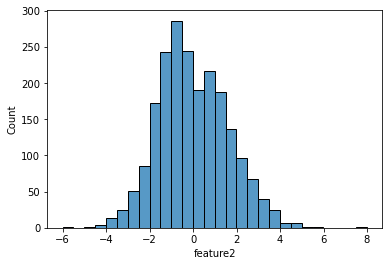

FEATURE3

Estadísticas

count   2100.000
mean      -0.328
std        1.480
min       -5.471
25%       -1.368
50%       -0.532
75%        0.574
max        4.870
Name: feature3, dtype: float64

Distribución


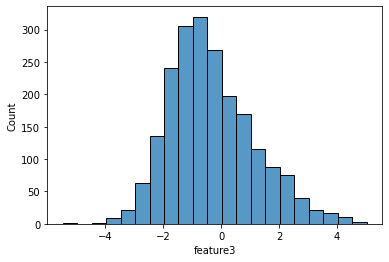

FEATURE4

Estadísticas

count   2100.000
mean       0.024
std        1.548
min       -5.296
25%       -1.084
50%        0.153
75%        1.173
max        4.319
Name: feature4, dtype: float64

Distribución


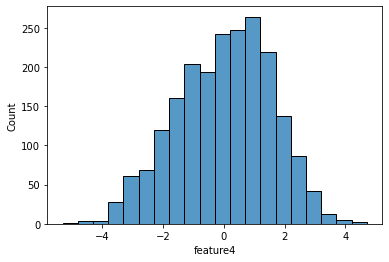

FEATURE5

Estadísticas

count   2100.000
mean       0.086
std        1.789
min       -5.719
25%       -1.136
50%        0.103
75%        1.507
max        6.033
Name: feature5, dtype: float64

Distribución


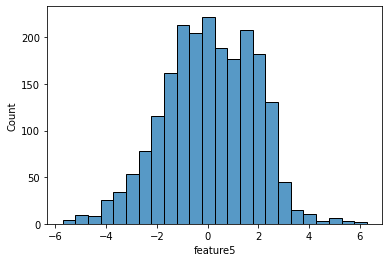

FEATURE6

Estadísticas

count   2100.000
mean      -0.065
std        2.124
min       -4.911
25%       -1.613
50%       -0.431
75%        1.163
max        7.053
Name: feature6, dtype: float64

Distribución


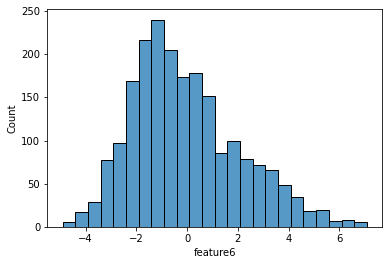

FEATURE7

Estadísticas

count   2100.000
mean      -0.026
std        1.016
min       -3.851
25%       -0.701
50%       -0.008
75%        0.666
max        4.401
Name: feature7, dtype: float64

Distribución


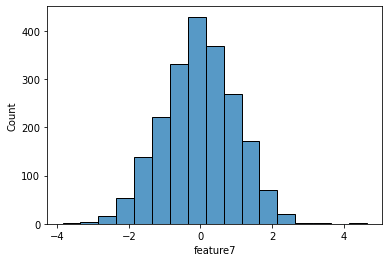

FEATURE8

Estadísticas

count   2100.000
mean      -0.004
std        1.003
min       -3.542
25%       -0.659
50%       -0.020
75%        0.668
max        3.580
Name: feature8, dtype: float64

Distribución


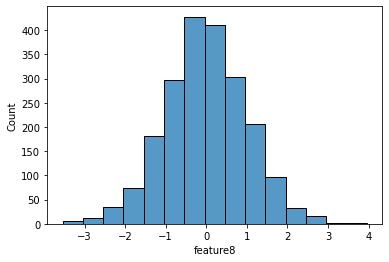

In [10]:
for feature in df.columns[:-1]:
    print(feature.upper())
    print('\nEstadísticas\n')
    print(df[feature].describe().T)
    print('\nDistribución')
    _ = sns.histplot(data=df, x=feature, binwidth=0.5)
    plt.show()

#### Target vs features means

In [11]:
target_mean = df.groupby('target').mean().reset_index()

In [12]:
target_mean

,target,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0,1.000,1.033,-1.006,-0.026,-1.249,2.143,-0.030,0.055
1,1,-0.998,-0.991,-1.022,0.068,0.356,-0.992,-0.046,-0.024
2,2,-0.996,-0.039,1.100,0.032,1.202,-1.414,-0.000,-0.047


#### Target vs features boxplots

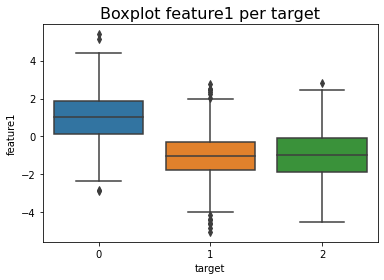

In [13]:
_ = sns.boxplot(x="target", y="feature1", data=df)
plt.title("Boxplot feature1 per target", fontsize='16')
plt.show()

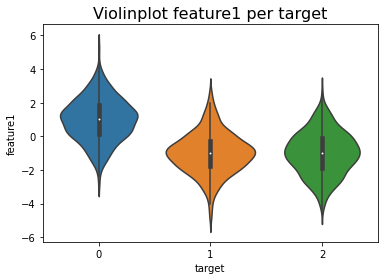

In [14]:
_ = sns.violinplot(data=df, x='target', y='feature1')
plt.title("Violinplot feature1 per target", fontsize='16')
plt.show()

**La feature1 tiene una media superior para la target=0**

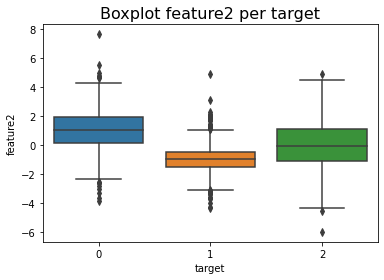

In [15]:
_ = sns.boxplot(x="target", y="feature2", data=df)
plt.title("Boxplot feature2 per target", fontsize='16')
plt.show()

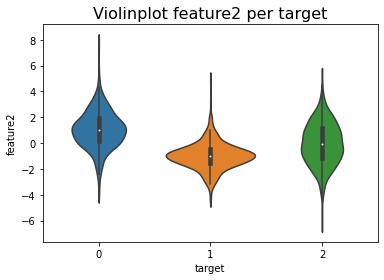

In [16]:
_ = sns.violinplot(data=df, x='target', y='feature2')
plt.title("Violinplot feature2 per target", fontsize='16')
plt.show()

**La feature2 tiene una media superior para la target=0**

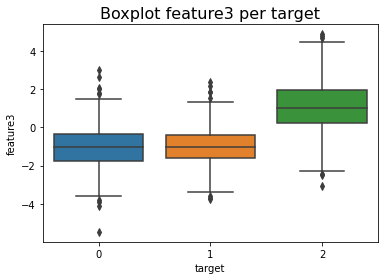

In [17]:
_ = sns.boxplot(x="target", y="feature3", data=df)
plt.title("Boxplot feature3 per target", fontsize='16')
plt.show()

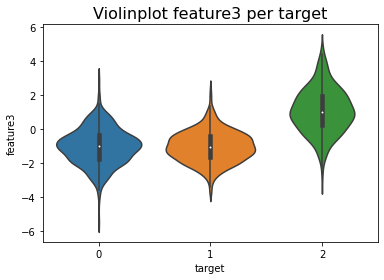

In [18]:
_ = sns.violinplot(data=df, x='target', y='feature3')
plt.title("Violinplot feature3 per target", fontsize='16')
plt.show()

**La feature3 tiene una media superior en la target=2**

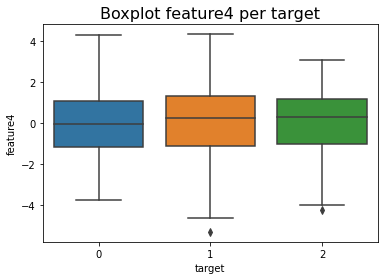

In [19]:
_ = sns.boxplot(x="target", y="feature4", data=df)
plt.title("Boxplot feature4 per target", fontsize='16')
plt.show()

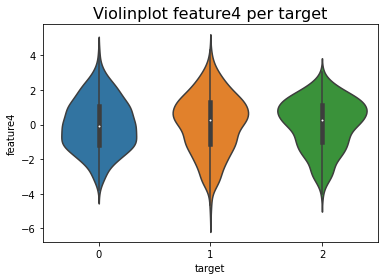

In [20]:
_ = sns.violinplot(data=df, x='target', y='feature4')
plt.title("Violinplot feature4 per target", fontsize='16')
plt.show()

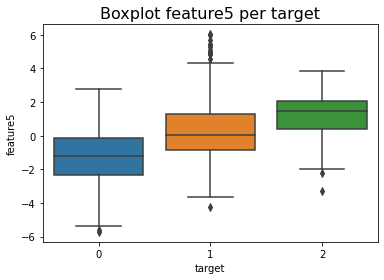

In [21]:
_ = sns.boxplot(x="target", y="feature5", data=df)
plt.title("Boxplot feature5 per target", fontsize='16')
plt.show()

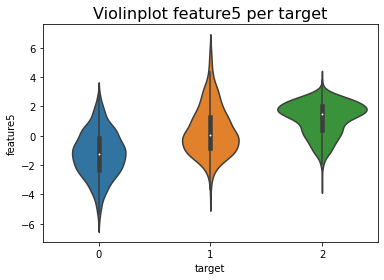

In [22]:
_ = sns.violinplot(data=df, x='target', y='feature5')
plt.title("Violinplot feature5 per target", fontsize='16')
plt.show()

**La feature5 tiene diferencias entre medias y distribución de las distintas labels de la taget**

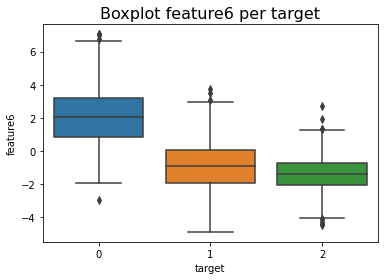

In [23]:
_ = sns.boxplot(x="target", y="feature6", data=df)
plt.title("Boxplot feature6 per target", fontsize='16')
plt.show()

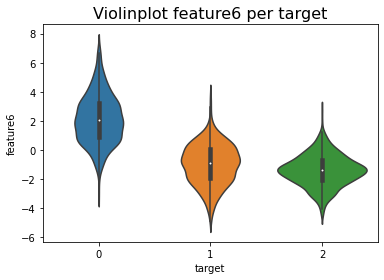

In [24]:
_ = sns.violinplot(data=df, x='target', y='feature6')
plt.title("Violinplot feature6 per target", fontsize='16')
plt.show()

**En la feature6, la target=0 tiene una mayor media**

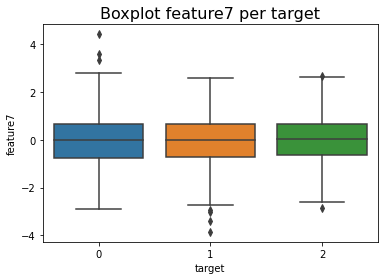

In [25]:
_ = sns.boxplot(x="target", y="feature7", data=df)
plt.title("Boxplot feature7 per target", fontsize='16')
plt.show()

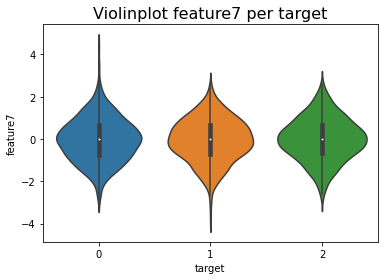

In [26]:
_ = sns.violinplot(data=df, x='target', y='feature7')
plt.title("Violinplot feature7 per target", fontsize='16')
plt.show()

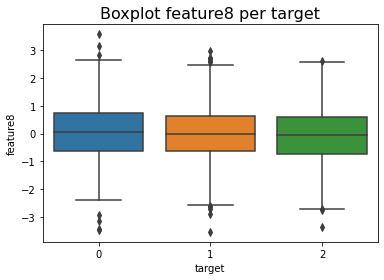

In [27]:
_ = sns.boxplot(x="target", y="feature8", data=df)
plt.title("Boxplot feature8 per target", fontsize='16')
plt.show()

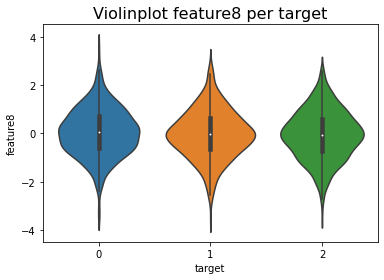

In [28]:
_ = sns.violinplot(data=df, x='target', y='feature8')
plt.title("Violinplot feature8 per target", fontsize='16')
plt.show()

#### Pairplots

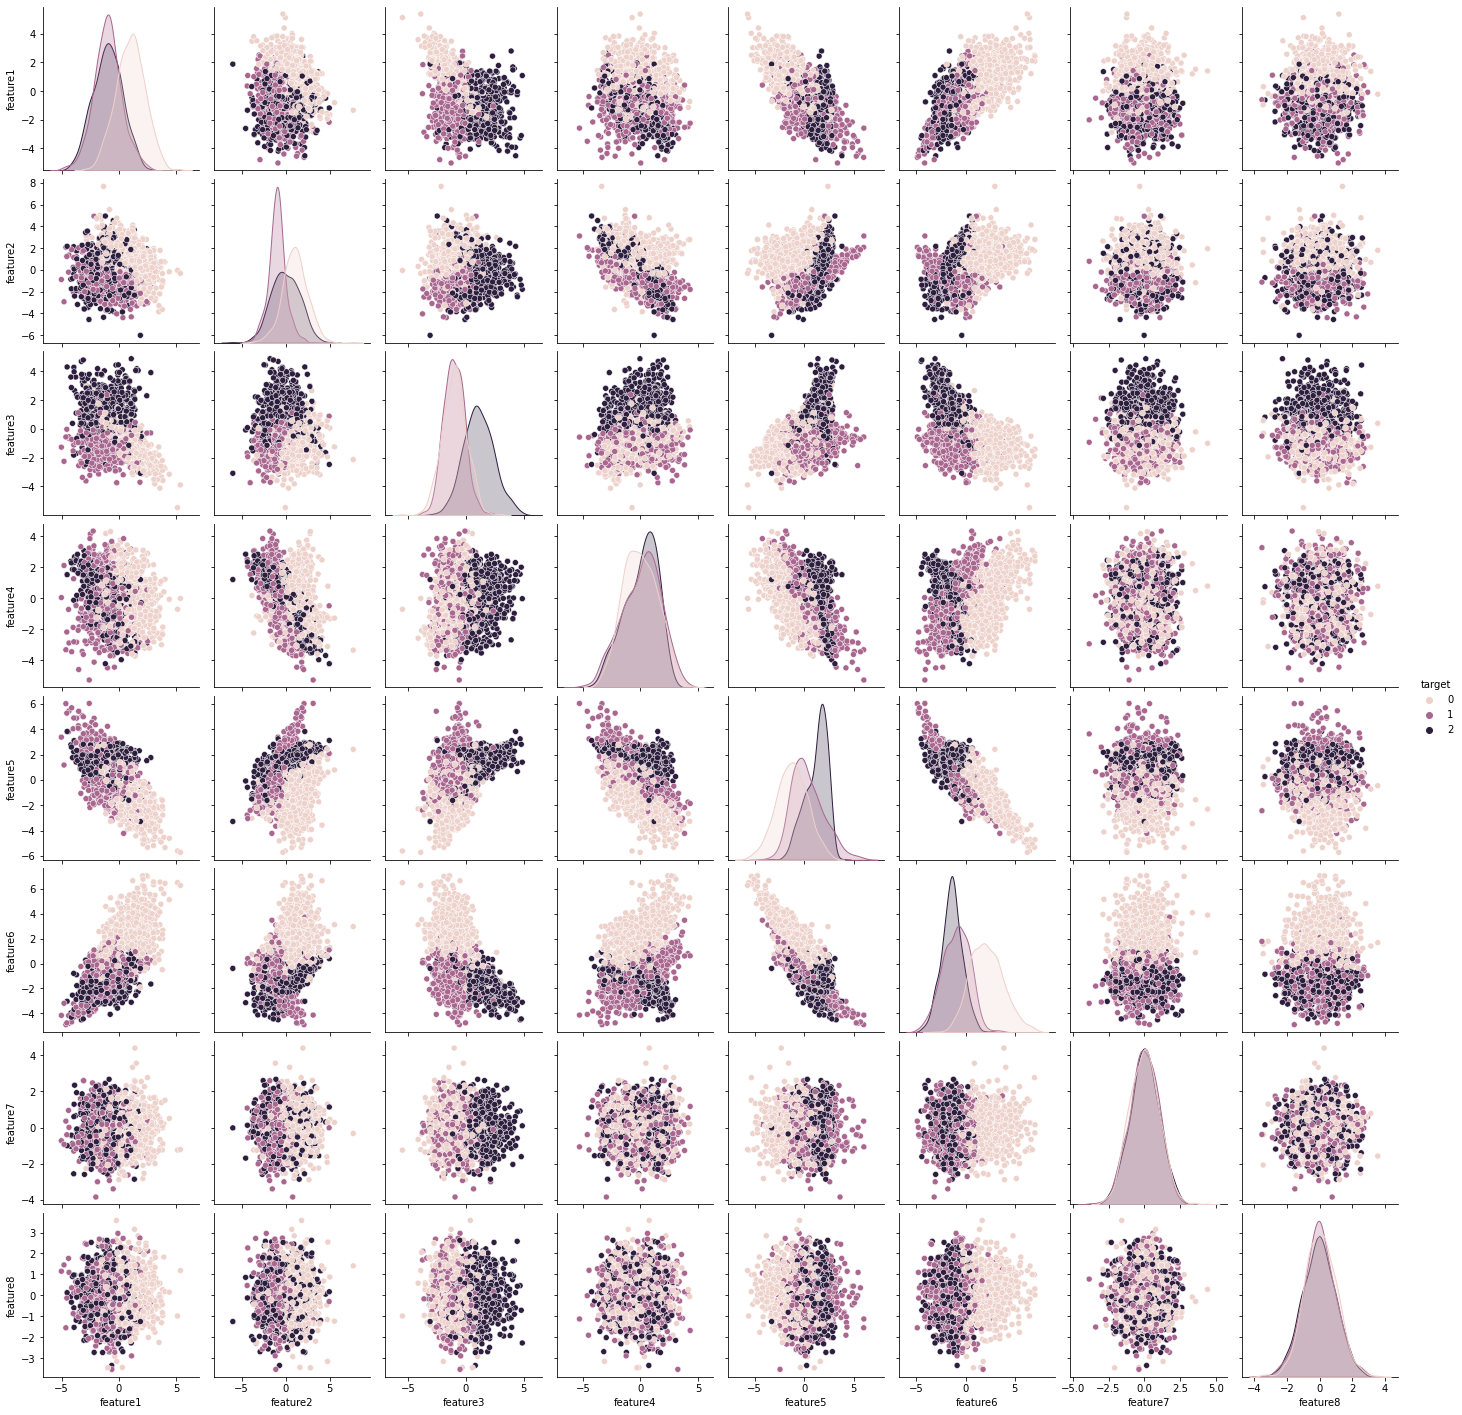

In [29]:
sns.pairplot(df, hue='target')
plt.show()

**En el paiplot se detecta buena separación entre las 3 labels y parece que las features 5 y 6 tienen correlación negativa.**

#### Correlation

In [30]:
num_cols = df._get_numeric_data().columns
corr = df[num_cols].corr()

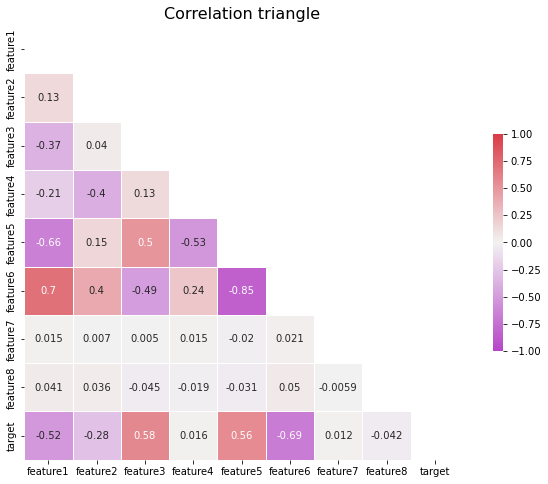

In [31]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation triangle", fontsize='16')
plt.show()

**Hay una correlación alta negativa (-0,85) entre feature5 y feature6, podría haber colinearidad entre las dos features.***

## Preprocesado

### Copia de train para modelo

In [32]:
train_ = train.copy()

In [33]:
train_.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,-0.458,-0.579,2.886,-0.076,1.674,-2.432,0.535,-0.846,2
1,1.627,-0.028,-1.443,-1.007,-0.989,1.203,-0.038,-1.299,0
2,1.721,-0.138,-1.323,-1.333,-0.724,0.843,-0.588,0.067,0
3,-0.715,3.266,-0.791,-2.968,2.498,-0.277,-0.552,0.668,2
4,2.944,0.198,-2.257,1.033,-4.105,4.716,-0.381,-1.394,0


### Train Test Split

In [34]:
X = train_.drop(['target'], axis=1)
y = train_['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [36]:
features = X.columns

In [37]:
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
558,-0.142,0.713,-0.417,2.825,-2.540,3.164,1.711,0.410
341,-1.259,0.731,-0.796,-3.237,3.343,-2.929,0.228,-0.560
1179,-0.365,2.560,0.234,0.788,-0.499,2.256,-1.186,-1.584
659,-1.709,1.926,-0.145,-1.385,2.282,-1.079,-0.603,-1.407
1031,1.729,-0.151,-1.876,1.106,-3.048,3.299,-0.427,0.387


In [38]:
X_test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
1630,-0.050,0.113,0.782,0.286,0.114,-0.117,-0.468,1.104
1386,-1.115,1.193,0.770,-1.352,2.241,-1.612,-1.028,1.986
966,-2.131,-1.151,-1.012,1.510,0.007,-0.783,0.566,0.004
685,1.292,0.940,-1.014,-0.069,-1.432,2.280,0.639,0.572
985,0.975,-0.568,-0.143,0.190,-0.925,0.614,0.323,0.758


In [39]:
y_train.head()

558     0
341     1
1179    0
659     2
1031    0
Name: target, dtype: int64

In [40]:
y_test.head()

1630    2
1386    2
966     1
685     0
985     2
Name: target, dtype: int64

In [41]:
features

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8'],
      dtype='object')

### Separibilidad de las clases

In [42]:
x_tsne = TSNE().fit_transform(df[df.columns[:-1]])

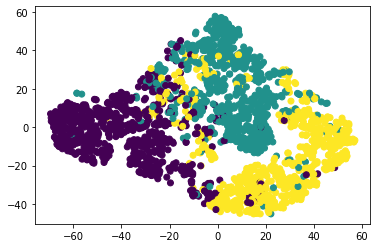

In [43]:
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=df.target)
plt.show()

**Se detecta una buena separabilidad entre las clases con TSNE, excepto en los bordes que se mezclan las 3 clase**

## Modelos

### Random Forest

In [44]:
rf = RandomForestClassifier(random_state = 5)

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [46]:
rf.score(X_train, y_train)

1.0

In [47]:
rf.score(X_test, y_test)

0.919047619047619

**El modelo está un poco overfiteado, prediciendo 8 puntos mejor el train que el test.**

In [48]:
y_pred = rf.predict(X_test)

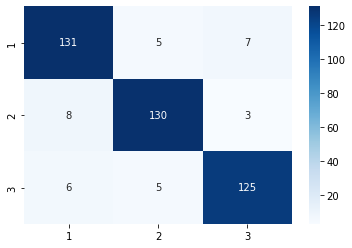

In [49]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,  
            cmap=plt.cm.Blues,
                yticklabels=[1,2,3],
                xticklabels=[1,2,3],
               fmt='g')
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       143
           1       0.93      0.92      0.93       141
           2       0.93      0.92      0.92       136

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.92      0.92      0.92       420



**Vemos que predice de manera similar las 3 clases.**

In [51]:
fi = pd.DataFrame([rf.feature_importances_],columns=features)
fi

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.103,0.174,0.230,0.072,0.118,0.249,0.027,0.027


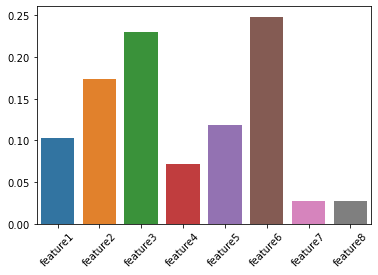

In [52]:
_ = sns.barplot(data=fi)
plt.xticks(rotation=45)
plt.show()

### Extra Tree Classifier

In [53]:
et = ExtraTreesClassifier(random_state = 5)

In [54]:
et.fit(X_train, y_train)

ExtraTreesClassifier(random_state=5)

In [55]:
et.score(X_train, y_train)

1.0

In [56]:
et.score(X_test, y_test)

0.9214285714285714

**Como el RandomForest está un poco overfiteado, unos 8 puntos**

In [57]:
y_pred = et.predict(X_test)

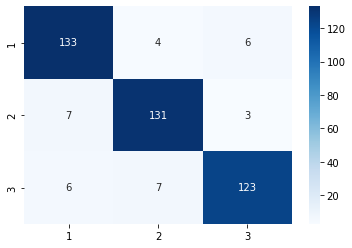

In [58]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,  
            cmap=plt.cm.Blues,
                yticklabels=[1,2,3],
                xticklabels=[1,2,3],
               fmt='g')
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       143
           1       0.92      0.93      0.93       141
           2       0.93      0.90      0.92       136

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.92      0.92      0.92       420



### Gradient Boosting

In [60]:
gb = GradientBoostingClassifier(random_state = 5)

In [61]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=5)

In [62]:
gb.score(X_train, y_train)

0.9696428571428571

In [63]:
gb.score(X_test, y_test)

0.9047619047619048

**Gradient Boosting Classifier está un poco menos preciso, y también menos overfiteado**

In [64]:
y_pred = gb.predict(X_test)

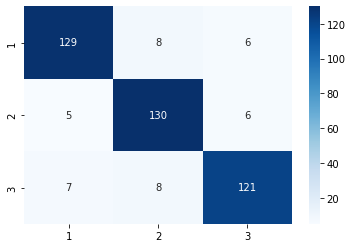

In [65]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,  
            cmap=plt.cm.Blues,
                yticklabels=[1,2,3],
                xticklabels=[1,2,3],
               fmt='g')
plt.show()

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       143
           1       0.89      0.92      0.91       141
           2       0.91      0.89      0.90       136

    accuracy                           0.90       420
   macro avg       0.91      0.90      0.90       420
weighted avg       0.91      0.90      0.90       420



### Knn Neighbors

In [67]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

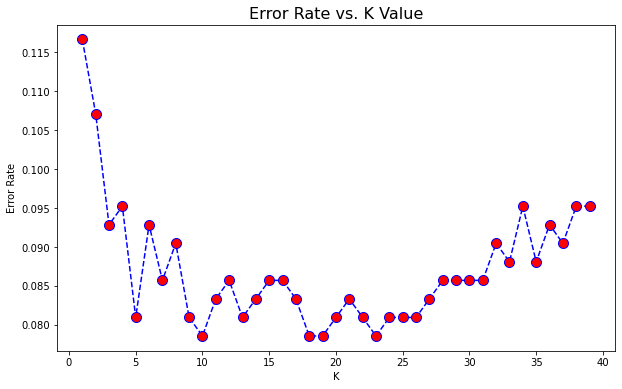

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=16)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

**Probaremos con 5 y compararemos con 10 para ver si vale la pena**

#### 5 Knn neighbors

In [69]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
knn.score(X_train, y_train)

0.930952380952381

In [72]:
knn.score(X_test, y_test)

0.919047619047619

In [73]:
y_pred = knn.predict(X_test)

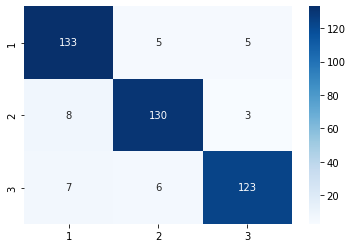

In [74]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,  
            cmap=plt.cm.Blues,
                yticklabels=[1,2,3],
                xticklabels=[1,2,3],
               fmt='g')
plt.show()

#### 10 Knn neighbors

In [75]:
knn10 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  

In [76]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [77]:
knn10.score(X_train, y_train)

0.9202380952380952

In [78]:
knn10.score(X_test, y_test)

0.9214285714285714

**Con 10 neighbors obtenemos muy buen resultado, y ademas no tenemos overfiting**

In [79]:
y_pred = knn10.predict(X_test)

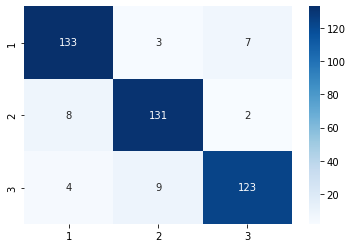

In [80]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,  
            cmap=plt.cm.Blues,
                yticklabels=[1,2,3],
                xticklabels=[1,2,3],
               fmt='g')
plt.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       143
           1       0.92      0.93      0.92       141
           2       0.93      0.90      0.92       136

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.92      0.92      0.92       420



### StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
transformer = scaler.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [84]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [85]:
rf.score(X_train, y_train)

1.0

In [86]:
rf.score(X_test, y_test)

0.919047619047619

In [87]:
et.fit(X_train, y_train)

ExtraTreesClassifier(random_state=5)

In [88]:
et.score(X_train, y_train)

1.0

In [89]:
et.score(X_test, y_test)

0.9214285714285714

In [90]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=5)

In [91]:
gb.score(X_train, y_train)

0.9696428571428571

In [92]:
gb.score(X_test, y_test)

0.9047619047619048

In [93]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [94]:
knn10.score(X_train, y_train)

0.9130952380952381

In [95]:
knn10.score(X_test, y_test)

0.9023809523809524

**El escaler no mejora los resultados**

## Fine tuning: Knn

In [96]:
print('Parameters que hemos usado en el modelo a mejorar:\n')
print(knn10.get_params())

Parameters que hemos usado en el modelo a mejorar:

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [97]:
param_grid = {
'leaf_size' : [10,30,50],
'n_neighbors' : [5, 10],
'p': [1,2],  
}

In [98]:
knn_h = KNeighborsClassifier()

In [99]:
clf_knn = GridSearchCV(knn_h, param_grid, cv=10)

In [100]:
best_model_knn = clf_knn.fit(X,y)

In [101]:
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 10
Best p: 2
Best n_neighbors: 5


In [102]:
params = {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

In [103]:
knn_hh = KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, metric= 'minkowski', metric_params= None, n_jobs= None, n_neighbors= 5, p= 2, weights= 'uniform')  

In [104]:
knn_hh.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10)

In [105]:
knn_hh.score(X_train, y_train)

0.925

In [106]:
knn_hh.score(X_test, y_test)

0.9095238095238095

In [107]:
y_pred = knn_hh.predict(X_test)

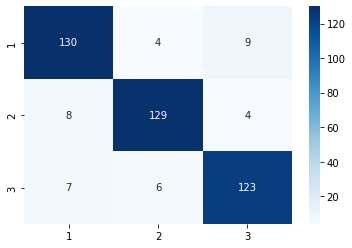

In [108]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,  
            cmap=plt.cm.Blues,
                yticklabels=[1,2,3],
                xticklabels=[1,2,3],
               fmt='g')
plt.show()

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       143
           1       0.93      0.91      0.92       141
           2       0.90      0.90      0.90       136

    accuracy                           0.91       420
   macro avg       0.91      0.91      0.91       420
weighted avg       0.91      0.91      0.91       420



### Fine Tunning: Extra Tree

In [110]:
print('Parameters que hemos usado en el modelo a mejorar:\n')
print(et.get_params())

Parameters que hemos usado en el modelo a mejorar:

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}


In [114]:
param_grid = {
    'n_estimators':  [10,100, 200],
    'criterion': ['gini', 'entropy'],
    'class_weight' : ['balanced'],
}

In [115]:
et_h = ExtraTreesClassifier(random_state = 5)

In [116]:
clf_et = GridSearchCV(et_h, param_grid, cv=10)

In [117]:
best_model_et = clf_et.fit(X,y)

In [118]:
best_model_et.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}

In [119]:
et_hh = ExtraTreesClassifier(random_state = 5,criterion = 'entropy', n_estimators=100, class_weight='balanced')  

In [120]:
et_hh.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', criterion='entropy',
                     random_state=5)

In [121]:
et_hh.score(X_train, y_train)

1.0

In [122]:
et_hh.score(X_test, y_test)

0.9238095238095239

In [123]:
y_pred = et_hh.predict(X_test)

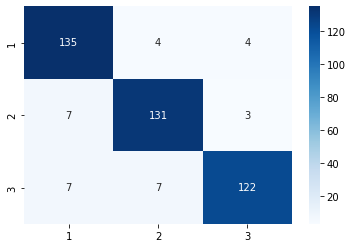

In [124]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,  
            cmap=plt.cm.Blues,
                yticklabels=[1,2,3],
                xticklabels=[1,2,3],
               fmt='g')
plt.show()

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       143
           1       0.92      0.93      0.93       141
           2       0.95      0.90      0.92       136

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.92      0.92      0.92       420



**Nos quedamos con este modelo hipertuneado de ExtraTreeClassification**

## Prediccion

In [126]:
test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.052,2.515,-0.198,1.979,-2.015,3.853,-2.126,0.795
1,-0.828,0.086,1.713,0.079,1.280,-1.462,2.470,0.817
2,-1.086,-0.142,0.013,-0.115,0.948,-1.122,0.517,0.251
3,0.093,2.869,-0.075,0.651,-0.886,2.917,-0.723,0.063
4,0.046,2.823,0.434,-3.055,2.538,-0.717,0.862,-0.525


In [127]:
prediction = et_hh.predict(test)

In [128]:
prediction

array([0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1,
       1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       2, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2,
       2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1,
       2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1,

In [129]:
df_prediction = pd.DataFrame(prediction, columns=['target'])


In [130]:
df_prediction.head()

,target
0,0
1,2
2,1
3,0
4,2


In [131]:
df_prediction.to_csv(r'data/prediction.csv', index = False)

## Json Export

In [132]:
df_prediction.head()

,target
0,0
1,2
2,1
3,0
4,2


In [134]:
json_prediction = df_prediction.to_json()
json_prediction

'{"target":{"0":0,"1":2,"2":1,"3":0,"4":2,"5":1,"6":2,"7":0,"8":1,"9":1,"10":0,"11":1,"12":1,"13":1,"14":2,"15":2,"16":2,"17":1,"18":1,"19":0,"20":0,"21":0,"22":1,"23":0,"24":0,"25":1,"26":1,"27":1,"28":1,"29":2,"30":0,"31":1,"32":2,"33":1,"34":2,"35":0,"36":0,"37":2,"38":1,"39":0,"40":1,"41":1,"42":2,"43":1,"44":1,"45":0,"46":0,"47":0,"48":1,"49":2,"50":2,"51":0,"52":1,"53":0,"54":0,"55":1,"56":1,"57":2,"58":2,"59":0,"60":1,"61":0,"62":2,"63":0,"64":1,"65":0,"66":1,"67":2,"68":1,"69":0,"70":0,"71":0,"72":1,"73":0,"74":2,"75":0,"76":0,"77":0,"78":1,"79":2,"80":2,"81":2,"82":2,"83":1,"84":2,"85":0,"86":0,"87":1,"88":0,"89":1,"90":1,"91":0,"92":0,"93":0,"94":0,"95":2,"96":2,"97":1,"98":1,"99":1,"100":0,"101":0,"102":0,"103":2,"104":0,"105":2,"106":2,"107":1,"108":0,"109":1,"110":2,"111":0,"112":1,"113":1,"114":2,"115":1,"116":2,"117":2,"118":2,"119":0,"120":0,"121":1,"122":2,"123":1,"124":1,"125":1,"126":2,"127":1,"128":1,"129":1,"130":1,"131":0,"132":2,"133":0,"134":0,"135":1,"136":2,"1

In [135]:
with open('predictions.json', 'w') as outfile:
    outfile.write(json_prediction)